<a href="https://colab.research.google.com/github/jeffreyboschman/basic_ml_with_numpy/blob/main/classic_statistical_machine_learning_algorithms_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn import preprocessing


# Preparing the data

In [37]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data" -O breast_cancer_wisconsin.csv
df = pd.read_csv('breast_cancer_wisconsin.csv', names =['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'])
df

--2022-07-30 03:21:06--  http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124103 (121K) [application/x-httpd-php]
Saving to: ‘breast_cancer_wisconsin.csv’

breast_cancer_wisco 100%[===================>] 121.19K   580KB/s    in 0.2s    

2022-07-30 03:21:07 (580 KB/s) - ‘breast_cancer_wisconsin.csv’ saved [124103/124103]



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


We can split this Pandas dataframe up into the labels (in this case, the diagnosis of 'benign' vs 'malignant') and the features (all the other variables)

In [48]:
labels = df.loc[:,'diagnosis']
labels

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [65]:
#features = df.iloc[:,2:-1]
features = df.iloc[:,2:7]
features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [66]:
features.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360
std,3.524049,4.301036,24.298981,351.914129,0.014064
min,6.981000,9.710000,43.790000,143.500000,0.052630
25%,11.700000,16.170000,75.170000,420.300000,0.086370
50%,13.370000,18.840000,86.240000,551.100000,0.095870
75%,15.780000,21.800000,104.100000,782.700000,0.105300
max,28.110000,39.280000,188.500000,2501.000000,0.163400


Next we are going to normalize (technically standardize) the features to have zero mean and unit variance. We can do this by subtracting the mean of each feature (a column) from each value, and then dividing by the feature's standard deviation. By default, Pandas applies operations (like `.mean()` and `.std()`) down each row (because it is `axis=0`). In other words, it applies these methods on each column separately, which is exactly what we want.

In [67]:
features = (features - features.mean()) / features.std()
features.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.311195e-16,6.243785e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.027864e+00,-2.227289e+00,-1.982759e+00,-1.453164e+00,-3.109349e+00
25%,-6.887793e-01,-7.253249e-01,-6.913472e-01,-6.666089e-01,-7.103378e-01
50%,-2.148925e-01,-1.045442e-01,-2.357726e-01,-2.949274e-01,-3.486040e-02
75%,4.689800e-01,5.836621e-01,4.992377e-01,3.631877e-01,6.356397e-01
max,3.967796e+00,4.647799e+00,3.972634e+00,5.245913e+00,4.766717e+00


Next we are going to convert these different dataframes into NumPy arrays, as we want to practice using NumPy operations specifically. 




First, we want to save the names of the features.



In [68]:
feature_names = features.keys()
feature_names

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean'],
      dtype='object')

And now we can convert them both to NumPy arrays

In [69]:
features = np.array(features)
labels = np.array(labels)

However, sometimes NumPy operations only work on numerical data, so we are going to convert the labels (which are strings) to integers. We can use the `sklearn.preprocessing.LabelEncoder` for this, and can easily convert the labels back to their original categories denoted by strings later on. (https://stackoverflow.com/questions/42320834/sklearn-changing-string-class-label-to-int)

In [70]:
le = preprocessing.LabelEncoder()
le.fit(labels)
labels_int = le.transform(labels)
print(labels[:50])
print(labels_int[:50])

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0]


Great, so now we have our NumPy array named 'features' and our NumPy array named 'labels'. And we have the same number of examples in each. 

In [71]:
print(features.shape)
print(labels.shape)

(569, 5)
(569,)


# Exploring the data - covariance matrix

In [72]:
def plot_covariance_matrix(features, names=None, normalize=True):
    """Shows a covariance matrix for an array of features.

    Inputs:
    ------
    features: np.array
        A 2-d array where each column is a different feature

    names: list of str
        A list of names for the different features in features_array. Must be same length as axis 1 of features_array.
        If None, the features will be named "Feature 1", "Feature 2", etc in the covariance matrix.

    normalize: bool
        Whether or not to normalize the features to have zero mean and unit variance.
        Default = True.


    """
    if normalize is True:
        features = (features - np.mean(features, axis = 0))/(np.std(features, axis=0))

    if names is not None:
        df = pd.DataFrame(features, columns = names)
    else:
        names = [f'Feature {num}' for num in range(features.shape[1])]
        df = pd.DataFrame(features, columns = names)

    plt.figure(figsize=(20, 10))
    heatmap = sns.heatmap(df.corr(),cmap='BrBG',annot=True).set(title='Covariance Matrix')

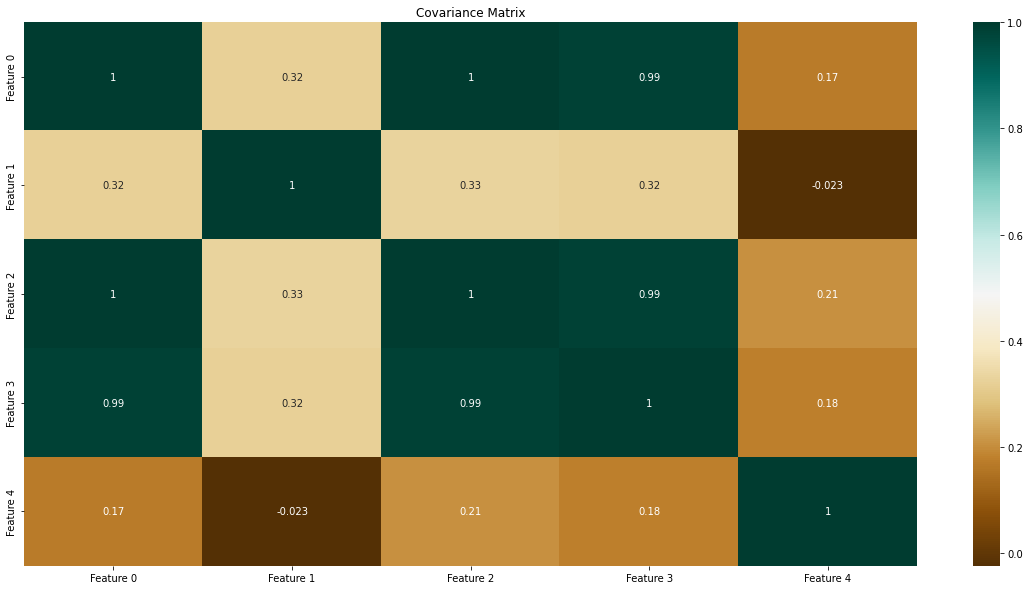

In [73]:
plot_covariance_matrix(features)

# Principal component analysis (dimensionality reduction)

In [74]:
#PCA https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
# https://www.askpython.com/python/examples/principal-component-analysis

In [75]:
class PCA:
    def __init__(self, features, labels, normalize=True):
        self.features = np.array(features)
        self.labels = np.array(labels)
        
        #Step-1
        if normalize is True:
            self.features = (self.features - np.mean(self.features, axis = 0))/(np.std(self.features, axis=0))
            
        print(self.features.shape)
    
    def reduce_dimensions(self, num_dims):
        #Step-2
        cov_mat = np.cov(self.features, rowvar = False)
     
        #Step-3
        eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
        #Step-4
        sorted_index = np.argsort(eigen_values)[::-1]
        sorted_eigenvalue = eigen_values[sorted_index]
        sorted_eigenvectors = eigen_vectors[:,sorted_index]

         #Step-5
        eigenvector_subset = sorted_eigenvectors[:,0:num_dims]
     
        #Step-6
        features_reduced = np.dot(eigenvector_subset.transpose() , self.features.transpose() ).transpose()
     
        return features_reduced

    def plot_2_dimensions(self):
        features_reduced_2 = self.reduce_dimensions(2)

        fig, ax = plt.subplots()

        x = features_reduced_2[:,0]
        y = features_reduced_2[:,1]

        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")

        ax.scatter(x, y, c=self.labels, cmap='Set1')

        plt.show()


(569, 5)
(569, 2)


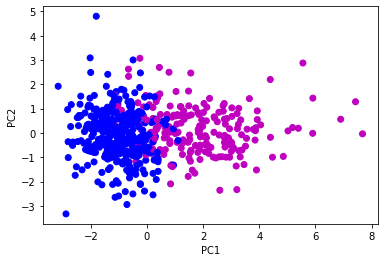

In [76]:
pca = PCA(features, labels)
#features_2dims = pca.reduce_dimensions(2)
print(features_2dims.shape)
pca.plot_2_dimensions()

# Create ref/test splits from lower-dimensional data

In [ ]:
SPLIT_PERCENT = 0.7

num_examples = features_2dims.shape[0]
shuffled_indices = np.random.permutation(num_examples)
max_train_idx = int(SPLIT_PERCENT*num_examples)
train_indices, test_indices = shuffled_indices[:max_train_idx], shuffled_indices[max_train_idx:]

ref_features, test_features, ref_labels, test_labels = features_2dims[train_indices], features_2dims[test_indices], labels[train_indices], labels[test_indices]
print(ref_features.shape, test_features.shape, ref_labels.shape, test_labels.shape)

(398, 2) (171, 2) (398,) (171,)


# k-nearest neighbours (classification)

In [ ]:
#https://stackoverflow.com/questions/56153726/plot-k-nearest-neighbor-graph-with-8-features

cmap_light = ListedColormap(['bisque', 'lightcyan', 'palegreen'])
cmap_bold = ListedColormap(['darkorange', 'cyan', 'limegreen'])

class KNN():
    def __init__(self, ref_features, ref_labels):
        '''Initializes the k-nn classifier based on a ref_features matrix and the corresponding class labels for each point in ref_features.
        
        ref_features is an array with size (n,d), where n is the number of points (rows) and d is the number of features that each point has
        ref_labels is an array of integers with size (n), so there is an integer representing a class label for each point (row) of ref_features
        '''
        
        self.ref_features = np.array(ref_features)
        self.ref_labels = np.array(ref_labels)
        assert ref_features.shape[0] == ref_labels.shape[0], f"The size of the first dimension of ref_features {ref_features.shape[0]} does \
            not equal the size of the first dimension of ref_labels {ref_labels.shape[0]}"

        self.ref_df = pd.DataFrame(self.ref_labels, columns=['orig_labels'])
        self.ref_df['ax1'] = self.ref_features[:,0]
        self.ref_df['ax2'] = self.ref_features[:,1]

        self.le = preprocessing.LabelEncoder() #label encoder to make sure labels are int
        self.le.fit(self.ref_df.orig_labels)
        self.ref_df['int_labels'] = self.le.transform(self.ref_df.orig_labels)


    def get_predictions(self, k, test_features):
        '''Calculates the predicted classes of the points (rows) of test_features according to the k nearest points (rows) in ref_features.
        
        k is a user-defined constant that determines how many points in the ref_features matrix will determine the class of a point in 
            test_features (the class of the majority of the k nearest ref_features points will determine the class of the test_features point)
        test_features is an array of points that we want to classify with size (m,d) (i.e. same number of features d as ref_features)
        '''
        test_features = np.array(test_features)
        assert test_features.shape[1] == self.ref_features.shape[1], f"The number of features of test_features {test_features.shape[1]} does \
            not equal the number of dimensions of ref_features {self.ref_features.shape[1]}"  
        
        k = int(k)
        _ref_features = np.expand_dims(self.ref_features, axis=1) #shape (n, 1, d)
        _test_features = np.expand_dims(test_features, axis=0) #shape (1, m, d)
        distances = np.linalg.norm(_ref_features - _test_features, axis=2, ord=2) #shape (n,m)
        top_k_indices = distances.argsort(axis = 0)[:k] #shape (k,m)
        top_k_labels = np.take(np.array(self.ref_df['int_labels']), top_k_indices).astype(int) #shape (k,m)
        pred_labels = np.apply_along_axis(lambda x: np.bincount(x).argmax(), 0, top_k_labels) #shape (m,)

        return pred_labels
    
    def calculate_background(self, k, dx):
        x_min, x_max = self.ref_df['ax1'].min() - 0.1, self.ref_df['ax1'].max() + 0.1
        y_min, y_max = self.ref_df['ax2'].min() - 0.1, self.ref_df['ax2'].max() + 0.1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, dx),
                             np.arange(y_min, y_max, dx))
        background_preds = self.get_predictions(k, np.c_[xx.ravel(), yy.ravel()])
        background_preds = background_preds.reshape(xx.shape)

        return xx, yy, background_preds

    def plot_2d_knn(self, k, test_features = None, test_labels = None, dx = 0.1,):
        '''Visualizes the ref_features points (as circles) on a 2d graph and plots the k-nn decision boundary based on the ref_features and k 
        (Note: only works if ref_features has only 2 features). 
        If given, also plots the points of test_features (as stars).'''

        assert self.ref_features.shape[1] == 2, f"This visualizer can only plot a 2d graph, but your ref_features matrix has {self.ref_features.shape[1]} features"
        
        k = int(k)
        xx, yy, background_preds = self.calculate_background(k, dx)

        fig, ax = plt.subplots()

        background_plot = ax.pcolormesh(xx, yy, background_preds, cmap=cmap_light)
        ref_points_plot = ax.scatter(self.ref_df['ax1'], self.ref_df['ax2'], c=self.ref_df["int_labels"], cmap=cmap_bold, s=20)

        if test_features is not None and test_labels is not None:
            test_features = np.array(test_features)
            test_labels = np.array(test_labels)
            test_df = pd.DataFrame(test_labels, columns=['orig_labels'])
            test_df['int_labels'] = self.le.transform(test_df.orig_labels)
            test_preds = self.get_predictions(k, test_features)
            test_points_plot = ax.scatter(test_features[:, 0], test_features[:, 1], c=test_df['int_labels'], cmap=cmap_bold, marker = '*',  s=70)
            
            test_legend = ax.legend(*test_points_plot.legend_elements(),
                     loc="lower right", title="Test points")
            ax.add_artist(test_legend)
        
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ref_legend = ax.legend(*ref_points_plot.legend_elements(),
                     loc="lower left", title="Ref points")
        
        plt.show


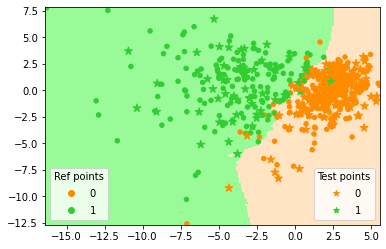

In [ ]:
knn2 = KNN(ref_features, ref_labels)
knn2.plot_2d_knn(k=3, test_features = test_features, test_labels = test_labels)

# Support Vector Machine

# Linear Regression

In [ ]:
class LinearRegression():

    def __init__(self):
        